In [4]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

import io
import fitz
import re
from PIL import Image, ImageDraw, ImageFont, ImageColor
import operator
import os
import pandas as pd 
import numpy as np
from datetime import datetime
import math
from tqdm import tqdm

from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

import io
import fitz
import re
from PIL import Image, ImageDraw, ImageFont, ImageColor
import operator
import os
import pandas as pd 
import numpy as np
from datetime import datetime
import math
from tqdm import tqdm
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont


from matplotlib import pyplot as plt

from numpy import array, linspace

In [5]:
parent = "../" 
"""INDEX 1"""
pdf_dir1 = parent + "input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 1.pdf"
doc1 = fitz.open(pdf_dir1)
pages1 = [doc1[i] for i in range(doc1.page_count)]
index1 = range(616, 639)
"""INDEX 1"""


"""INDEX 2"""
pdf_dir2 = parent + "/input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 2.pdf"
doc2 = fitz.open(pdf_dir2)
pages2 = [doc2[i] for i in range(doc2.page_count)]
index2 = list(range(703, 725))
"""INDEX 2"""

"""INDEX 3"""
pdf_dir3 = parent + "input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 3.pdf"
doc3 = fitz.open(pdf_dir3)
pages3 = [doc3[i] for i in range(doc3.page_count)]
index3 = list(range(555, 583))
"""INDEX 3"""


TARGET_DPI = 300
mat = fitz.Matrix(TARGET_DPI/ 72, TARGET_DPI/ 72)

indent_groups = []
indent_err = 15

In [6]:
pdf_dir = pdf_dir3
doc = doc3
pages = pages3
index = index3
vol = 3

In [139]:
def get_linex(page_num):
    block_lst = pages[page_num].get_text("dict")['blocks']

    pix_map = doc.get_page_pixmap(page_num,matrix=mat)
    image = Image.open(io.BytesIO(pix_map.tobytes()))
    draw = ImageDraw.Draw(image)

    line_x = []
    for b in block_lst:
        if b['type'] == 0:
            for l in b['lines']:
                x0 = l['bbox'][0]*(TARGET_DPI/ 72)
                #if x0 < 500:
                line_x0 = x0
                line_x.append(line_x0)
    return np.array(line_x )

In [140]:
g1 = np.random.normal(100, 2, 50)
g2 = np.random.normal(120, 2, 50)
g3 = np.random.normal(500, 5, 50)
g4 = np.random.normal(1800, 5, 50)
g5 = np.random.normal(200, 20, 10)
g6 = np.random.normal(1300, 20, 10)

x = linspace(0,2000)

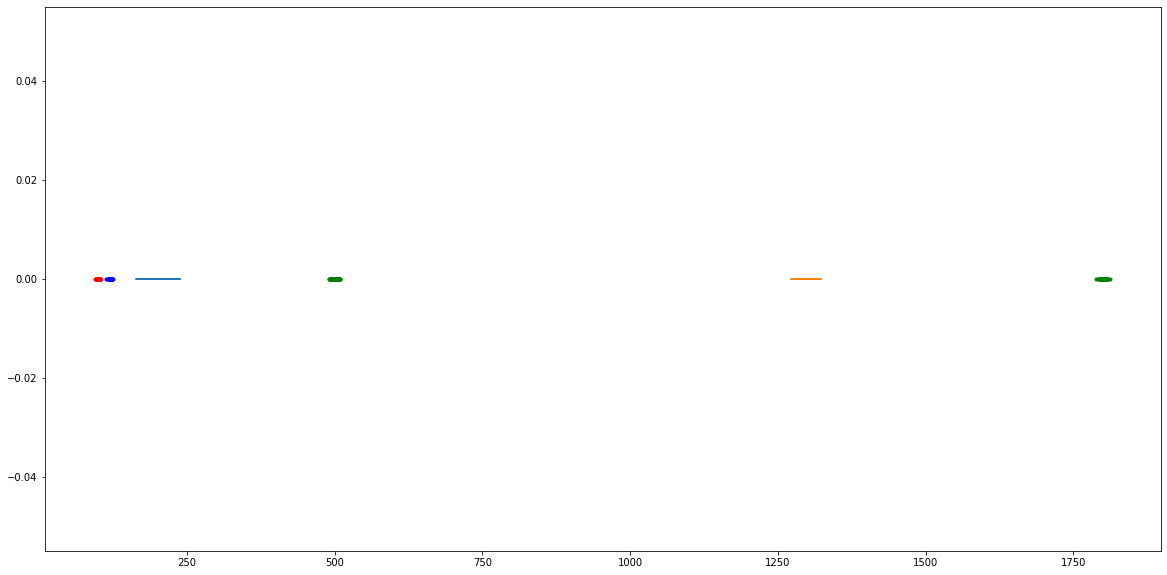

In [141]:
plt.figure(figsize=(20, 10))
plt.plot(g1, len(g1)*[0], 'r.')
plt.plot(g2, len(g2)*[0], 'b.')
plt.plot(g3, len(g2)*[0], 'g.')
plt.plot(g4, len(g2)*[0], 'g.')
plt.plot(g5, len(g5)*[0])
plt.plot(g6, len(g6)*[0])

In [259]:
all_g = np.hstack([g1, g2, g3, g4, g5, g6])
#all_g = get_linex(index[10])

In [218]:
bandwidth = estimate_bandwidth(all_g.reshape(-1,1), quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
#ms = MeanShift(bin_seeding=True)

ms.fit(all_g.reshape(-1,1))
labels = ms.labels_
cluster_centers = ms.cluster_centers_
#centers = list(zip([page_num]*len(cluster_centers), cluster_centers.flatten()))
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [219]:
n_clusters_

11

In [220]:
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
shapes = ['.', 'o', 'x', 'v', '^', '>', '<', 'p', '*', 's', 'd']
marker = []
for s in shapes:
    for c in color:
        marker.append(c+s)

In [221]:
marker_list = np.array(list(map(lambda x: marker[x], labels)))

In [222]:
#plt.plot(all_g, len(all_g)*[0], marker = marker_list) -- this doesn't work hm

In [223]:
marker_list = np.array(list(map(lambda x: marker[x], labels)))
df = pd.DataFrame({'x0': all_g, 'label':labels, 'marker':marker_list, 'zeros':np.zeros(len(all_g))})

In [224]:
df

,x0,label,marker,zeros
0,731.000010,8,go,0.0
1,1621.000036,0,b.,0.0
2,132.000001,3,c.,0.0
3,789.773051,1,g.,0.0
4,169.999997,4,m.,0.0
...,...,...,...,...
209,1653.999964,0,b.,0.0
210,1653.000005,0,b.,0.0
211,1653.999964,0,b.,0.0
212,1653.999964,0,b.,0.0


<Figure size 1440x7200 with 0 Axes>

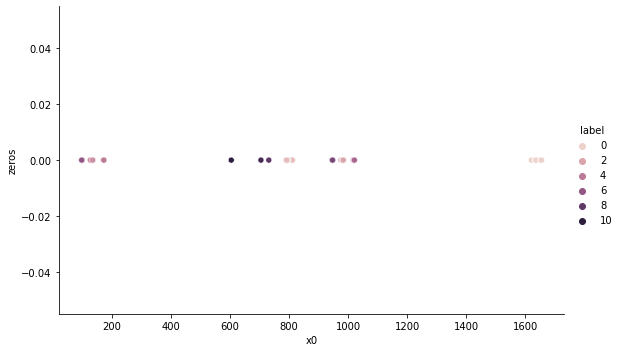

In [225]:
import seaborn as sns 
plt.figure(figsize=(20, 100))
#plt.plot(all_g, np.zeros(len(all_g)), color = labels)
sns.relplot(data=df, x='x0', y='zeros', hue='label', aspect=1.61)
plt.show()

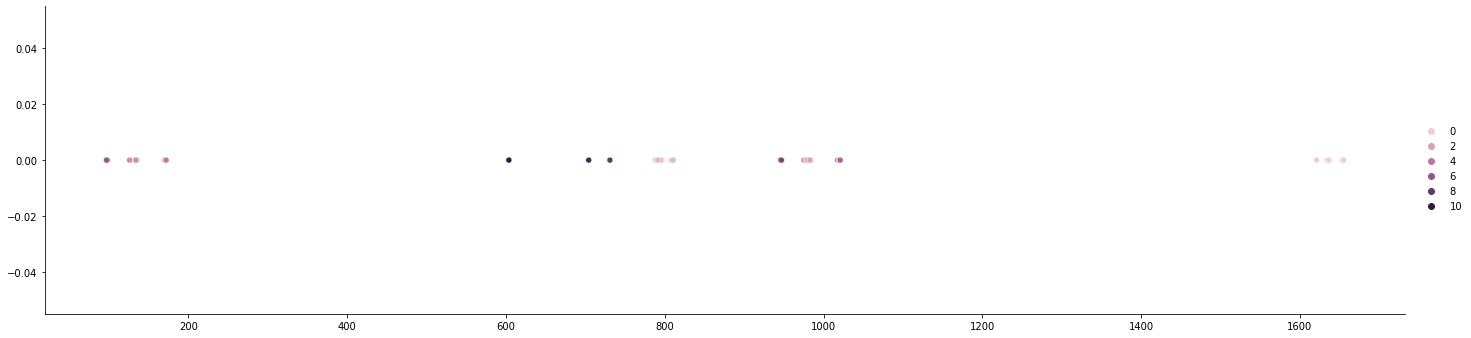

In [226]:
sns.relplot(x=all_g, y=np.zeros(len(all_g)), hue=labels, aspect=4)
plt.show()

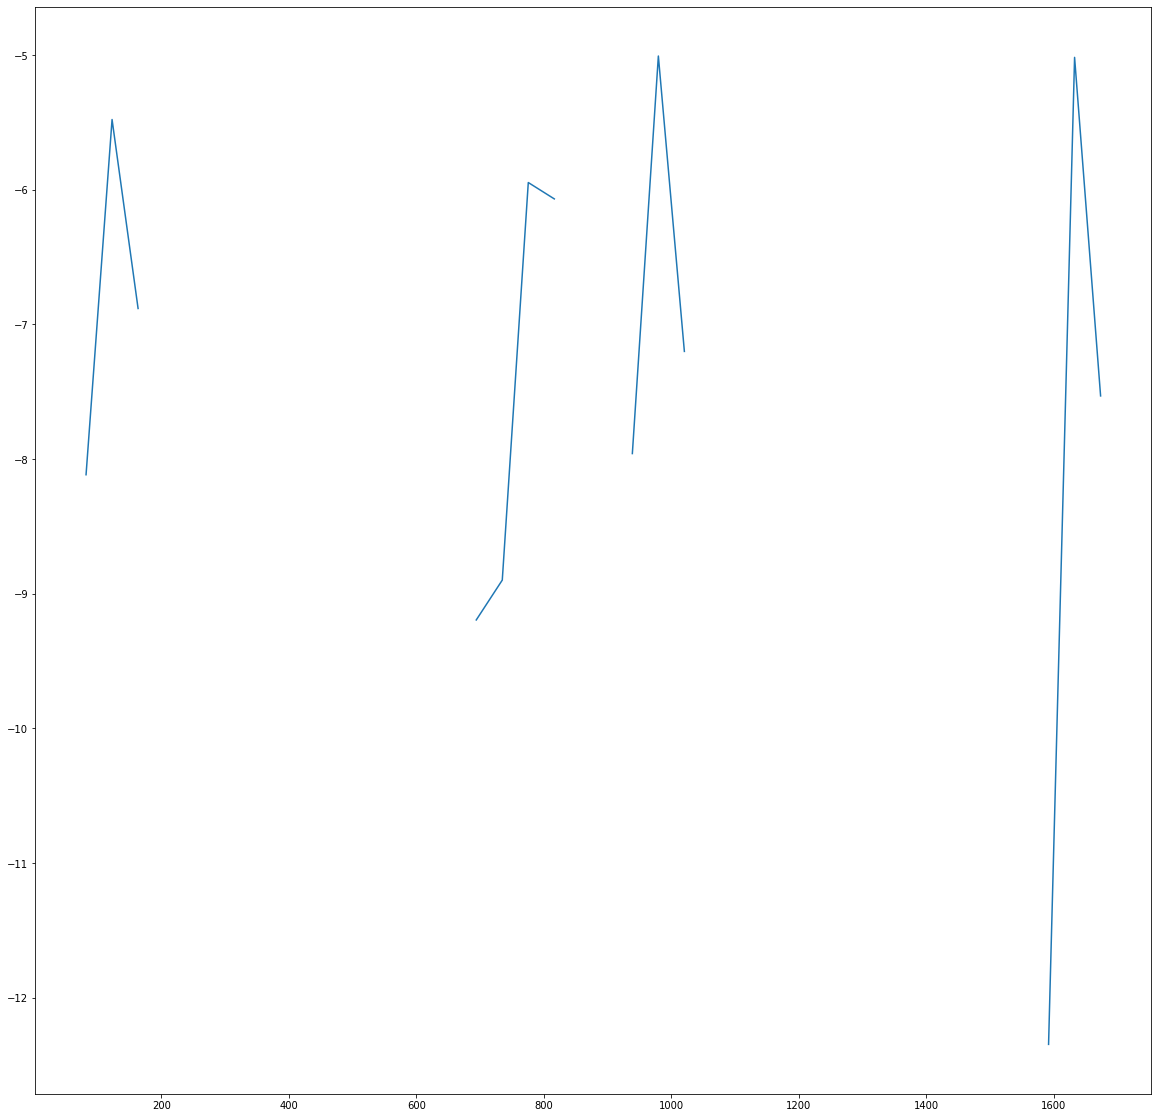

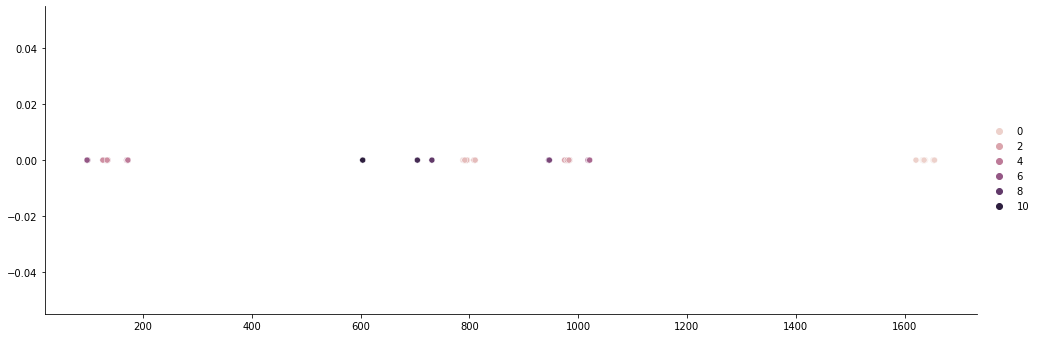

In [232]:
from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
plt.figure(figsize=(20, 20))

a = all_g.reshape(-1,1)
kde = KernelDensity(kernel='linear', bandwidth=30).fit(a)

s = linspace(0,2000)
e = kde.score_samples(s.reshape(-1,1))
plot(s, e)
sns.relplot(x=all_g, y=np.zeros(len(all_g)), hue=labels, aspect=2.8)
plt.show()

In [ ]:
g1 = np.random.normal(100, 2, 50)
g2 = np.random.normal(120, 2, 50)
g3 = np.random.normal(500, 5, 50)
g4 = np.random.normal(1800, 5, 50)
g5 = np.random.normal(200, 20, 10)
g6 = np.random.normal(1300, 20, 10)

<AxesSubplot:ylabel='Count'>

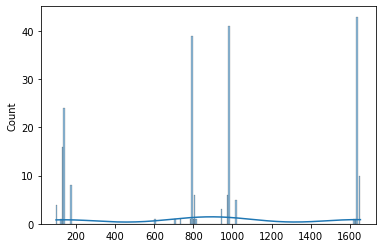

In [279]:
all_g = np.hstack([g1, g2, g3, g4, g5, g6])
all_g = get_linex(index[10])
sns.histplot(x=all_g, kde=True, bins=len(all_g))

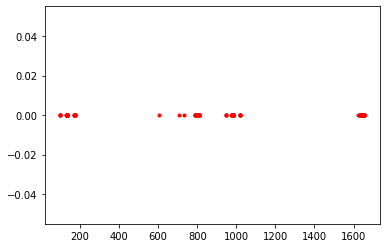

In [270]:
plt.plot(all_g, len(all_g)*[0], 'r.')

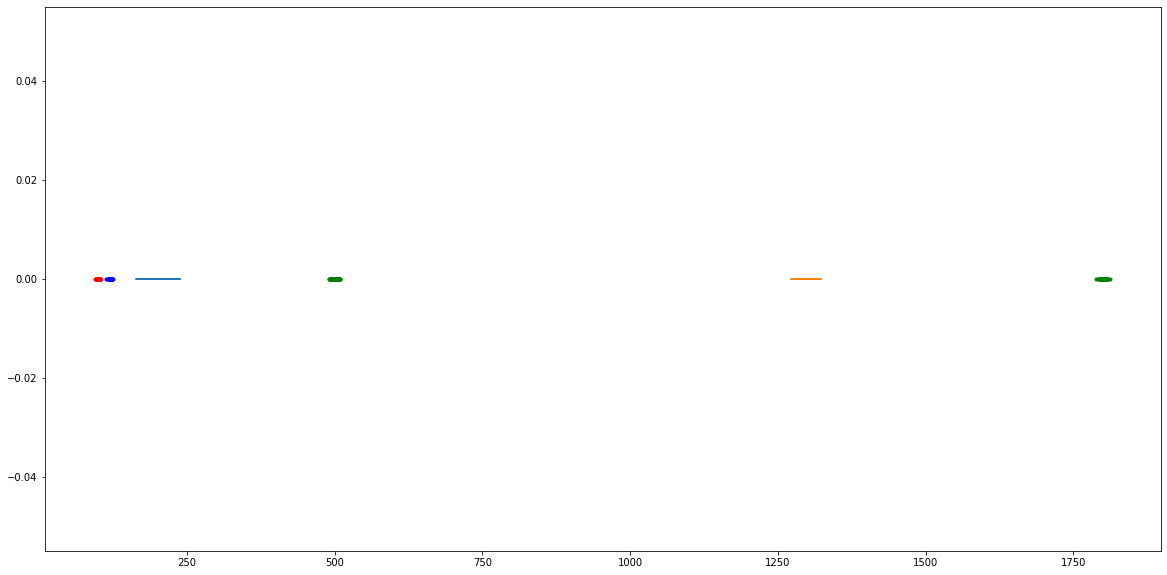

In [268]:
plt.figure(figsize=(20, 10))
plt.plot(g1, len(g1)*[0], 'r.')
plt.plot(g2, len(g2)*[0], 'b.')
plt.plot(g3, len(g2)*[0], 'g.')
plt.plot(g4, len(g2)*[0], 'g.')
plt.plot(g5, len(g5)*[0])
plt.plot(g6, len(g6)*[0])